# CAO Points Analysis
## Author: Ross Downey

http://www2.cao.ie/points/l8.php
***


In [1]:
# HTTP Requests Python Module
import requests as rq

# Regular expressions module
import re

# Dates and time module
import datetime as dt

# Pandas
import pandas as pd

# Downloading
import urllib.request as urlrq

# Plotting
import matplotlib.pyplot as plt

<br>

## 2021 Points

***

In [2]:
# Retrieving the 2021 CAO from this URL using the requests module
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Veryifing Python has downloaded the data from the URL, [200] means it's ok
resp

<Response [200]>

<br>  

## Ensuring original dataset is saved
***

In [3]:
# Saving current date and time as a function
now = dt.datetime.now()

# Convert date and time to a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Filepath to be created in data folder to save original data
filepath = 'data/cao2021_' + nowstr + '.html'

<br>

## Error on Server
***
Issue with the character set defined on the CAO server.  
The server says we should decode as per:  
    Content-Type: text/html; charset=iso-8859-1  
On decoding as per 'iso-8859-1' it was noted that one line is using \x96,  
which is not defined in iso-8859-1.  
The similar decoding standard 'cp1252' will be used, which has a codepoint for \x96.

In [5]:
# Amending the original encoding
original_encoding = resp.encoding

# Changing to 'cp1252'
resp.encoding = 'cp1252'

In [6]:
# Saving the original file downloaded from server
with open(filepath, 'w') as f:
    f.write(resp.text)

In [7]:
# Compiling the regular expression for the matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
# This gives us only the lines in the original HTML code that have CAO points

<br>

## Explanation of Regular Expression
***
re.compile  
r = converting html flags to raw strings  
[A-Z]{2} = Everything with 2 letters  
[0-9]{3} = Followed by 3 numbers, this is each course code e.g. AL801
(.*) is space then wildcard, this is the course title and points string.  
Need to now load all of the lines with course details and remove unnecessary spaces and characters, leaving the code, title, and points for each course.

In [8]:
# Creating filepath to save the new csv file
filepath = 'data/cao2021_csv_' + nowstr + '.csv'


# Adding a counter to total the number of courses processed
no_lines = 0

# Opening filepath to save new csv file
with open(filepath, 'w') as f:
    # Need a header row, defining column titles
    f.write(','.join (['Course Code', 'Course', 'R1 Points_2021', 
                      'R2 Points_2021']) + '\n')
# Looping through the lines of the data 
    for line in resp.iter_lines():
        
        # Decode the line but using the 'wrong' encoding
        dline = line.decode('cp1252')
    
        # Using regular expression to match lines with courses and points only
        if re_course.fullmatch(dline):
        
            # Adding 1 for each line matched to give an overall total using the counter
            no_lines = no_lines + 1
            
            # Define the course code, first five characters using index
            course_code = dline[:5]
            
            # Define the course title, using index also, stripping blank spaces
            course_title = dline [7:57].strip()
            
            # Define the round one points column, incorporating spaces
            course_points = re.split(' +', dline[60:])
            
            # If the course has a round 2 points value, needs to be included
            if len(course_points) != 2:
                course_points = course_points[:2]
        
            # Defining the above strings as one array
            linesplit = [course_code, course_title, 
                         course_points[0], course_points[1]]
            
            '''# Replacing special characters ('#', '*') from points columns
            # Taken from https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string
            course_points[0] = re.sub(r'[#|*|]',r'',course_points[0])
            course_points[1] = re.sub(r'[#|*|]',r'',course_points[1])
            Note: Did not work, manually edited csv file instead'''
        
            # Concatenate the substrings after splitting but with commas in between
            # Rejoined and using '\n' to add a new line for each course
            f.write(','.join(linesplit) + '\n')
        
# Displaying the total number of lines processed
print(f"Total number of lines is {no_lines}. ")

Total number of lines is 949. 


<br>

### Cleaning up csv file
***
1. Removed any special characters ( '#', '*' etc.) from the data to peform analysis on the data. This was done using "Find and Replace" in Notepad ++  
2. Saved csv file as "Ver2" to read into pandas


In [9]:
# Ensure Version 2 is read into pandas, removing special characters
df2021 = pd.read_csv('data/cao2021_csv_20211108_121221_ver2.csv',
                     encoding='cp1252', sep=',')

In [10]:
df2021

,Course Code,Course,R1 Points_2021,R2 Points_2021
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [11]:
# Spot Checking Index 181, confirming encoding and points
df2021.iloc[181]

Course Code                                                   CM003
Course            Oideachas – Bunmhúinteoireacht Trí Mheán na Ga...
R1 Points_2021                                                  513
R2 Points_2021                                                  NaN
Name: 181, dtype: object

<br>

## 2020 Points
***

https://www.cao.ie/index.php?page=points&p=2020&bb=points

<br>

### Saving Original File from CAO website

***

In [12]:
# Creating filepath for original 2020 data from CAO site
# File extension set as xlsx as original is in excel format
filepath2020 = 'data/cao2020_' + nowstr + '.xlsx'

In [13]:
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                  filepath2020)

('data/cao2020_20211115_191818.xlsx',
 <http.client.HTTPMessage at 0x1f150d8a9a0>)

<br>

### Loading 2020 Spreadsheet into Notebook using Pandas

***

In [14]:
# Downloading and Parsing the spreadsheet
# Skipping initial 10 rows as no relevant data contained within
# Only loading certain columns as not all needed
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                       skiprows=10,  usecols = [1,2,3,7,9])
df2020.rename(columns={'COURSE TITLE': 'Course', 'COURSE CODE2': 'Course Code',
                      'EOS Mid-point' : 'Mid_2020', 'R1 POINTS' : 'R1 Points_2020',
                      'EOS' : 'EOS_2020'},
              inplace=True)
# Re-labelling columns to align with other years' data
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df2020=df2020[['Course Code', 'Course', 'R1 Points_2020', 'EOS_2020', 'Mid_2020']]
# Re-arranging columns to align with other years' data
# https://erikrood.com/Python_References/change_order_dataframe_columns_final.html

In [15]:
# Checking first five rows for formatting
df2020.head()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020
0,AC120,International Business,209,209,280
1,AC137,Liberal Arts,252,252,270
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric


In [16]:
df2020.tail()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020
1459,WD208,Manufacturing Engineering,188,188,339
1460,WD210,Software Systems Development,279,279,337
1461,WD211,Creative Computing,271,271,318
1462,WD212,Recreation and Sport Management,270,270,349
1463,WD230,Mechanical and Manufacturing Engineering,253,253,369


In [17]:
# Spot checking random row
# Index 333 is the same as row 345 in original excel file
# Removed 10 rows, 1 row for header and 1 row for pandas index starting at 0
# Spot check aligns with original excel file
df2020.iloc[333]

Course Code                         DB576
Course            Film and Creative Media
R1 Points_2020                        AQA
EOS_2020                              AQA
Mid_2020                              338
Name: 333, dtype: object

In [18]:
# Spot Check last row
# Aligns with original excel file
df2020.iloc[-1]

Course Code                                          WD230
Course            Mechanical and Manufacturing Engineering
R1 Points_2020                                         253
EOS_2020                                               253
Mid_2020                                               369
Name: 1463, dtype: object

In [19]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2020 = 'data/cao2020_' + nowstr + '.csv'

In [20]:
# Saving dataframe
df2020.to_csv(filepath2020)

<br>

## 2019 Points
***

https://www.cao.ie/index.php?page=points&p=2019&bb=points

Steps taken to convert original pdf file to pandas dataframe
<br>
1. Original PDF file downloaded from link above
2. PDF file converted to Microsoft Word file
3. Microsoft Word file saved in docx format
4. Second copy of Word file saved as "_edited"
5. Headers, Footers and initial introduction deleted
6. Selected all and pasted into Notepad++
7. Removed all HEI names as had their own rows
8. Removed all special characters (#* etc.) using "Find and Replace"
9. Changed backticks (`) to apostrophes (') using "Find and Replace"
10. Changed column header from "Course and Institution" to "Course"
11. Extra "NaN" columns noted, removed double tab from course code AL870 (l.28)
12. Extra tabs at end of rows removed as not required.


In [21]:
df2019 = pd.read_csv('data/cao2019_20211102_194800_edited.csv', sep='\t',
                    usecols = [0,1,2,3])
df2019.rename(columns={'EOS' : 'EOS_2019', 'Mid' : 'Mid2019'}, inplace=True)
# Ref https://www.listendata.com/2019/06/pandas-read-csv.html

In [22]:
df2019

,Course Code,Course,EOS_2019,Mid2019
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [23]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2019 = 'data/cao2019_' + nowstr + '.csv'

In [24]:
# Saving dataframe
df2019.to_csv(filepath2019)

<br>

## Concatenate and Join Dataframes
***

Need to join the dataframes from different years to one dataframe in order to perform comparative analysis between the different years

In [25]:
# Creating new dataframe from 2021 with just Code and Course
courses2021 = df2021[['Course Code', 'Course']]
courses2021

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [26]:
# Creating new dataframe from 2020 with just Code and Course
# Column titles previously aligned across the years
courses2020 = df2020[['Course Code', 'Course']]
courses2020

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [27]:
# Concatenate the two newly created dataframes
# Ignoring the index creates a new index for this dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
allcourses = pd.concat([courses2021, courses2020], ignore_index=True)
allcourses

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2408,WD208,Manufacturing Engineering
2409,WD210,Software Systems Development
2410,WD211,Creative Computing
2411,WD212,Recreation and Sport Management


In [28]:
# Sorting the values by the course code instead
allcourses.sort_values('Course Code')

,Course Code,Course
175,AC120,International Business
949,AC120,International Business
950,AC137,Liberal Arts
176,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
...,...,...
2411,WD212,Recreation and Sport Management
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [29]:
# Spot check of duplicated rows, same title verified
allcourses.loc[2412]['Course']

'Mechanical and Manufacturing Engineering'

In [30]:
allcourses.loc[946]['Course']

'Mechanical and Manufacturing Engineering'

In [31]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
allcourses[allcourses.duplicated()]

,Course Code,Course
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
2404,WD200,Arts (options)
2409,WD210,Software Systems Development
2410,WD211,Creative Computing
2411,WD212,Recreation and Sport Management


In [32]:
# drop.duplicates removes the duplicated courses
allcourses.drop_duplicates()

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2403,WD195,Architectural and Building Information Modelli...
2405,WD205,Molecular Biology with Biopharmaceutical Science
2406,WD206,Electronic Engineering
2407,WD207,Mechanical Engineering


In [33]:
# Locate all rows with the same course title
allcourses[allcourses.duplicated(subset=['Course Code'])]

,Course Code,Course
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
2404,WD200,Arts (options)
2409,WD210,Software Systems Development
2410,WD211,Creative Computing
2411,WD212,Recreation and Sport Management


In [34]:
# Remove duplicates
allcourses.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)
allcourses

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1512,WD188,Applied Health Care
1513,WD205,Molecular Biology with Biopharmaceutical Science
1514,WD206,Electronic Engineering
1515,WD207,Mechanical Engineering


<br>

## Join the Dataframes to the Points
***
The points from each year need to be added now onto the one dataframe to compare

In [35]:
# The course code is now required to be the index of the dataframe
# Performed on original 2021 frame first for confirmation
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
df2021.set_index('Course Code', inplace=True)
df2021

,Course,R1 Points_2021,R2 Points_2021
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [36]:
# Set Course Code to index on "combined" dataframe
allcourses.set_index('Course Code', inplace=True)

In [37]:
# Adding 2021 Round 1 points to the new combined deduplicated dataframe
allcourses = allcourses.join(df2021[['R1 Points_2021']])
allcourses

,Course,R1 Points_2021
Course Code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
WD188,Applied Health Care,NaN
WD205,Molecular Biology with Biopharmaceutical Science,NaN
WD206,Electronic Engineering,NaN


In [38]:
# Calling just course codes and Round 1 points from 2020 dataframe
df2020_R1 = df2020[['Course Code', 'R1 Points_2020']]
df2020_R1

,Course Code,R1 Points_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [39]:
# Setting the index as the course code as done previously
df2020_R1.set_index('Course Code', inplace=True)
df2020_R1

,R1 Points_2020
Course Code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [40]:
# Join the 2020 Round 1 points to the 2021 Round 1 points
allcourses = allcourses.join(df2020_R1)
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD188,Applied Health Care,NaN,201
WD205,Molecular Biology with Biopharmaceutical Science,NaN,228
WD206,Electronic Engineering,NaN,179


In [41]:
allcourses.describe()

,Course,R1 Points_2021,R1 Points_2020
count,1517,924,1437
unique,1004,318,389
top,Business,300,300
freq,31,19,26


In [42]:
allcourses.index

Index(['AL801', 'AL802', 'AL803', 'AL805', 'AL810', 'AL811', 'AL820', 'AL830',
       'AL832', 'AL835',
       ...
       'WD174', 'WD175', 'WD177', 'WD182', 'WD184', 'WD188', 'WD205', 'WD206',
       'WD207', 'WD208'],
      dtype='object', name='Course Code', length=1517)

In [59]:
allcourses.replace('AQA',0)
allcourses.fillna(value=0)

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD188,Applied Health Care,0,201
WD205,Molecular Biology with Biopharmaceutical Science,0,228
WD206,Electronic Engineering,0,179


In [60]:
allcourses.iloc[842]

Course            Early Childhood - Teaching and Learning (part-...
R1 Points_2021                                                  AQA
R1 Points_2020                                                  327
Name: MH801, dtype: object

In [77]:
allcourses2 = allcourses.drop(
    allcourses.index[allcourses['R1 Points_2021'] == 'AQA'])
allcourses2

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD188,Applied Health Care,NaN,201
WD205,Molecular Biology with Biopharmaceutical Science,NaN,228
WD206,Electronic Engineering,NaN,179


In [78]:
# convert column "a" of a DataFrame
allcourses2["R1 Points_2021"] = pd.to_numeric(allcourses2["R1 Points_2021"])

array([[<AxesSubplot:title={'center':'R1 Points_2021'}>]], dtype=object)

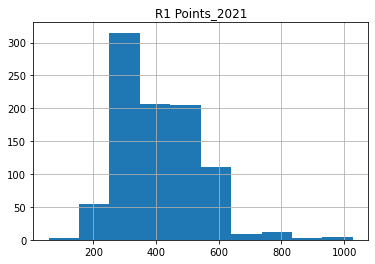

In [67]:
allcourses2.hist(column = 'R1 Points_2021')

In [ ]:
allcourses2 = allcourses.dropna()
allcourses2

In [ ]:
allcourse2 = allcourses2.replace('AQA','0', regex=True)

In [ ]:
allcourses2

## 2020 to 2019 Comparison

<br>
***

As we have EOS (End of Season) values from the 2020 dataframe and 2019 dataframe the best approach in terms of a comparative study, is to compare these two years using these EOS values. There are no EOS values at the time of writing for the 2021 data available on the CAO website.

In [ ]:
# Creating new dataframe from 2019 with just Code and Course
# Column titles previously aligned across the years
courses2019 = df2019[['Course Code', 'Course']]
courses2019

In [ ]:
# Concatenate the 2020 and 2019 dataframes
# Ignoring the index creates a new index for this dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
eos_courses = pd.concat([courses2020, courses2019], ignore_index=True)
eos_courses

In [ ]:
# Sorting the values by the course code instead
eos_courses.sort_values('Course Code')

In [ ]:
# Spot check of duplicated rows, same title verified
eos_courses.loc[1462]['Course']

In [ ]:
eos_courses.loc[2392]['Course']

In [ ]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
eos_courses[eos_courses.duplicated()]

In [ ]:
# drop.duplicates removes the duplicated courses
eos_courses.drop_duplicates()

In [ ]:
# Locate all rows with the same course title
eos_courses[eos_courses.duplicated(subset=['Course Code'])]

In [ ]:
# Remove the duplicates
eos_courses.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)
eos_courses

 ## Joining points
***
<br>
The EOS points from 2019 and 2020 need to be joined together onto one database for comparitive analysis.

In [ ]:
# Setting the index as Course Code
eos_courses.set_index('Course Code', inplace=True)
eos_courses

In [ ]:
# Adding 2020 EOS points to the new combined deduplicated dataframe
eos_courses = eos_courses.join(df2020[['EOS_2020']])
eos_courses

In [ ]:
# Calling just course codes and EOS points from 2019 dataframe
df2019_eos = df2019[['Course Code', 'EOS_2019']]
df2019_eos

In [ ]:
# Setting the index as Course Code
df2019_eos.set_index('Course Code', inplace=True)
df2019_eos

In [ ]:
# Join the 2019 EOS points to the 2020 EOS points
eos_courses = eos_courses.join(df2019_eos)
eos_courses

***
## End